<a href="https://colab.research.google.com/github/Analytic-Abdul/ITC-Role-Based-Aptitude-Test/blob/main/ITC_Role_Based_Aptitude_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Bitcoin Price using Python

To analyse bitcoin price data, the following processes are to be carried out:

1.   Download the necessary dependencies, in this case, yfinance
2.   Import the necessary libraries
  1.   yfinance to get data
  2.   pandas for data manipulation
  3.   matplotlib for data visualization





In [ ]:
# pip install the right api to programmatically get bitcoin price data

!pip install pycoingecko

In [ ]:
# import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
from pprint import pprint


In [ ]:
# initialise the API

cg = CoinGeckoAPI()


In [ ]:
# get the current BTC/USD price

current_price = cg.get_price(ids='bitcoin', vs_currencies='usd')['bitcoin']['usd']
print(f"Current Bitcoin Price: {current_price} USD")

Current Bitcoin Price: 83613 USD


In [ ]:
# get the BTC/USD price for the past year
# the free-tier of the API is limited to just 1 year of past data

btc_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=365)
pprint(btc_data)

{'market_caps': [[1710633600000, 1282404282863.459],
                 [1710720000000, 1344508983079.8567],
                 [1710806400000, 1331771923948.0378],
                 [1710892800000, 1223867418062.399],
                 [1710979200000, 1332594162507.5205],
                 [1711065600000, 1287348061971.4202],
                 [1711152000000, 1247366367469.2778],
                 [1711238400000, 1264722355270.5166],
                 [1711324800000, 1323456466317.511],
                 [1711411200000, 1371797489739.3416],
                 [1711497600000, 1375728580463.2524],
                 [1711584000000, 1360261687784.1018],
                 [1711670400000, 1390869723348.0437],
                 [1711756800000, 1374646886107.8396],
                 [1711843200000, 1370247487960.0945],
                 [1711929600000, 1401370211582.3662],
                 [1712016000000, 1373784286061.3486],
                 [1712102400000, 1288360536576.547],
                 [1712188800000,

In [ ]:
# Extract prices, market caps, and total volumes
prices = btc_data['prices']
market_caps = btc_data['market_caps']
total_volumes = btc_data['total_volumes']


In [ ]:
# show the value pairs (list of lists) for each key of the dictionary returned
# from the API

pprint(prices)
pprint(market_caps)
pprint(total_volumes)

[[1710633600000, 65292.31329331289],
 [1710720000000, 68425.41565643054],
 [1710806400000, 67708.94360930806],
 [1710892800000, 62132.51737873437],
 [1710979200000, 67819.05570684028],
 [1711065600000, 65535.97844847657],
 [1711152000000, 63509.04496523133],
 [1711238400000, 64285.80279102199],
 [1711324800000, 67310.98326810106],
 [1711411200000, 69938.94530200244],
 [1711497600000, 70082.05122475982],
 [1711584000000, 69435.75040305211],
 [1711670400000, 70710.19534863312],
 [1711756800000, 69919.05546148612],
 [1711843200000, 69702.3087473573],
 [1711929600000, 71246.95144060145],
 [1712016000000, 69785.92503802372],
 [1712102400000, 65440.41922587159],
 [1712188800000, 66123.938539074],
 [1712275200000, 68542.17715279506],
 [1712361600000, 67978.61023408506],
 [1712448000000, 69000.6499164776],
 [1712534400000, 69401.97360911008],
 [1712620800000, 71624.18486236996],
 [1712707200000, 69158.64381207665],
 [1712793600000, 70527.88997578963],
 [1712880000000, 70106.66413070948],
 [171

In [ ]:
# find the len of the value pairs and confirm they are the same

if len(prices) == len(market_caps) == len(total_volumes):
    print("All lists have the same length.")
else:
    print("Lists have different lengths.")

All lists have the same length.


In [ ]:
# Create a list of data for the DataFrame
data = []
for i in range(len(prices)):
    timestamp = prices[i][0]
    price = prices[i][1]
    market_cap = market_caps[i][1]
    total_volume = total_volumes[i][1]
    data.append([timestamp, price, market_cap, total_volume])



In [ ]:
# Create the DataFrame
df = pd.DataFrame(data, columns=['timestamp', 'price', 'market_cap', 'total_volume'])

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Display the DataFrame
print(df)

                            price    market_cap  total_volume
timestamp                                                    
2024-03-17 00:00:00  65292.313293  1.282404e+12  4.926544e+10
2024-03-18 00:00:00  68425.415656  1.344509e+12  4.719098e+10
2024-03-19 00:00:00  67708.943609  1.331772e+12  5.110182e+10
2024-03-20 00:00:00  62132.517379  1.223867e+12  8.017942e+10
2024-03-21 00:00:00  67819.055707  1.332594e+12  7.083680e+10
...                           ...           ...           ...
2025-03-13 00:00:00  83884.245788  1.662503e+12  4.178219e+10
2025-03-14 00:00:00  81098.900524  1.608477e+12  3.258359e+10
2025-03-15 00:00:00  83971.709161  1.665726e+12  2.857148e+10
2025-03-16 00:00:00  84391.690876  1.674173e+12  1.076180e+10
2025-03-16 17:36:39  83647.182689  1.658577e+12  1.489836e+10

[366 rows x 3 columns]


In [ ]:
prices = btc_data['prices']
df = pd.DataFrame(prices, columns=['timestamp', 'price'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

In [ ]:
# Display the first few rows of the data
df.head()

# Get descriptive statistics of the data
#df.describe()

,price,market_cap,total_volume
timestamp,,,
2024-03-17,65292.313293,1.282404e+12,4.926544e+10
2024-03-18,68425.415656,1.344509e+12,4.719098e+10
2024-03-19,67708.943609,1.331772e+12,5.110182e+10
2024-03-20,62132.517379,1.223867e+12,8.017942e+10
2024-03-21,67819.055707,1.332594e+12,7.083680e+10


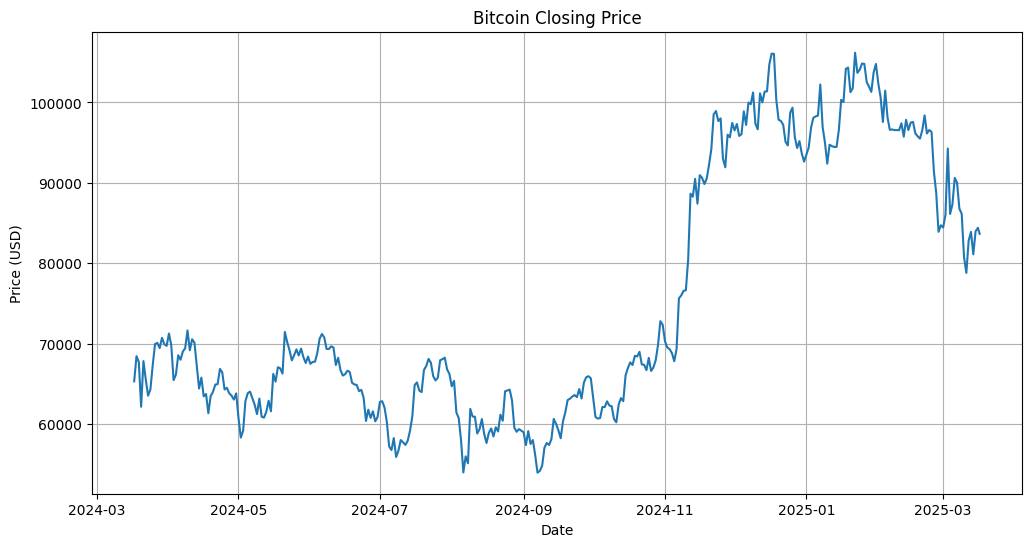

In [ ]:
# Plot the closing price of Bitcoin over time
plt.figure(figsize=(12, 6))
plt.plot(df['price'])
plt.title('Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

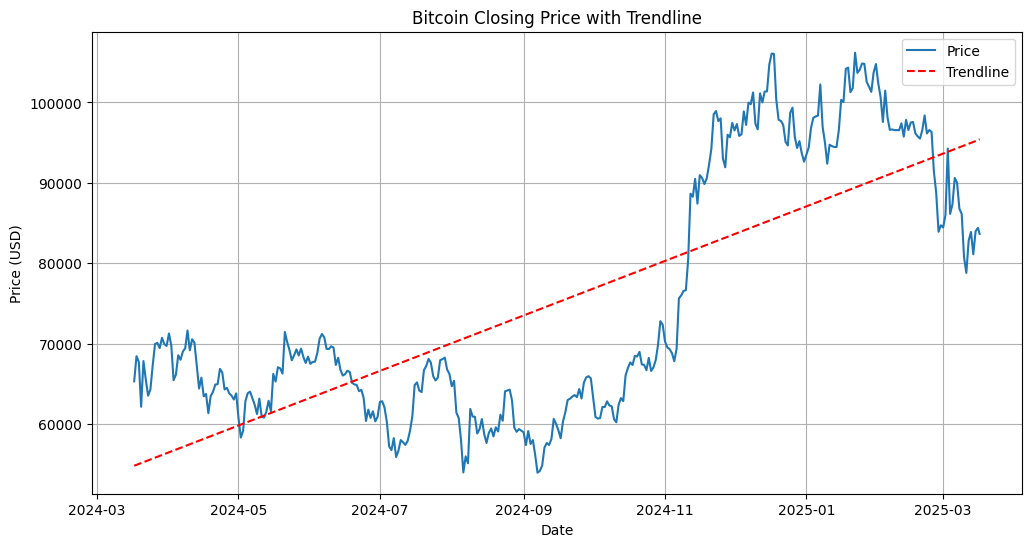

In [ ]:
# Calculate a linear trendline
x = np.arange(len(df['price']))
z = np.polyfit(x, df['price'], 1)
p = np.poly1d(z)

# Plot the price and the trendline
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['price'], label='Price')
plt.plot(df.index, p(x), 'r--', label='Trendline')
plt.title('Bitcoin Closing Price with Trendline')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


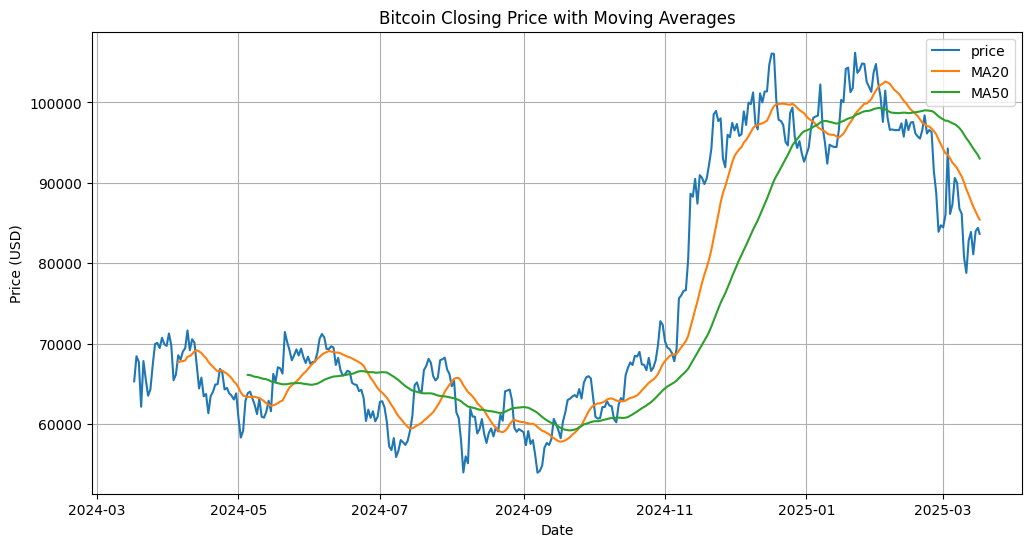

In [ ]:
# Calculate 20-day and 50-day moving averages
df['MA20'] = df['price'].rolling(window=20).mean()
df['MA50'] = df['price'].rolling(window=50).mean()

# Plot the moving averages along with the closing price
plt.figure(figsize=(12, 6))
plt.plot(df['price'], label='price')
plt.plot(df['MA20'], label='MA20')
plt.plot(df['MA50'], label='MA50')
plt.title('Bitcoin Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()